In [94]:
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [95]:
import os

In [96]:
os.chdir('D:\idea projects\pycharm projects\pygraph')

In [97]:
data1 = np.loadtxt('dataset/Dataset1.txt',usecols=(0,1,2))

In [98]:
nbrs1 = NearestNeighbors(n_neighbors=7).fit(data1)

In [99]:
import networkx as nx

In [100]:
g1 = nbrs1.kneighbors_graph()

In [101]:
graph1 = nx.from_scipy_sparse_matrix(g1)

In [102]:
laplacian1 = nx.laplacian_matrix(graph1)

In [103]:
import matplotlib.pyplot as plt

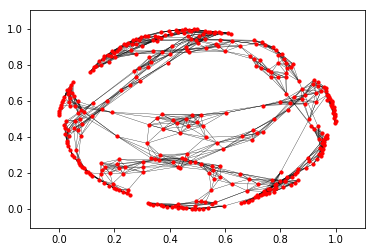

In [138]:
nx.draw_networkx(graph1,with_labels=False,node_size=10,width=.3)
plt.show()

In [106]:
list(nx.connected_component_subgraphs(graph1))

In [107]:
eig,eiv = sp.linalg.eigh(laplacian1.todense())


In [108]:
sorted_eig_arg = np.argsort(eig)

In [130]:
np.dot(eiv[:,1],eiv[:,2])

-2.0122792321330962e-16

In [119]:
sorted_eig = eig[sorted_eig_arg[::1]]
sorted_eiv = eiv[sorted_eig_arg[::1]]

In [110]:
first_vec = sorted_eiv[:,0]
second_vec = sorted_eiv[:,1]
third_vec = sorted_eiv[:,2]
fourth_vec = sorted_eiv[:,3]


In [111]:
node_rank = graph1.nodes()

In [112]:
zeros = np.zeros(eig.shape)

In [120]:
x = np.column_stack((zeros,second_vec))
kmeans = KMeans(n_clusters=2).fit(x)
labels = kmeans.labels_

In [122]:
def getlbl_kmeans(i):
    if i==0:
        return 'red'
    elif i==1:
        return 'blue'
    elif i==2:
        return 'green'
    elif i==3:
        return 'black'
    
def getlbl(i):
    if i>0:
        return 'red'
    return 'blue'
    

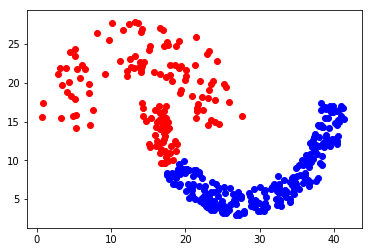

In [123]:
for ix,d in enumerate(data1[:,0:2]):
    x,y = d
    plt.scatter(x,y,c=getlbl(eiv[:,1][ix]))
plt.show()

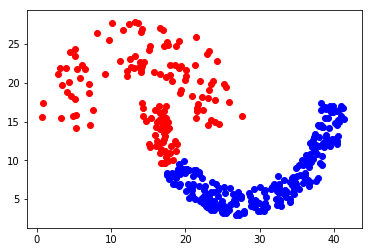

In [117]:
for ix,d in enumerate([:,0:2]):
    x,y = ddata1
    plt.scatter(x,y,c=getlbl_kmeans(labels[ix]))
plt.show()

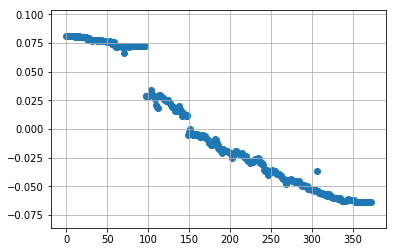

In [124]:
plt.scatter(graph1.nodes(),eiv[:, 1])
plt.grid(True)
plt.show()